This is a preprocessing fase.
data is stored in the "data" directory, and is seperated to train data and test data.
This fase is going to preprocess the train and test data and save them as .npy files in "processed_data" directory.
Making, training and testing the models is the next fase.

In case you want to make the gray scale data. Uncomment the lines after the (gray-scale) comment, and comment the lines wich have the same porpose.

# imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Train data

loading the train images located in "train" directory to data array and labels array 

In [18]:
data =[] # where we are gonna store the data
labels = [] # the correct labels for the images
classes =43 
project_path = os.getcwd() # current directory which the provided dataset is stored in ./data directory

for i in range(classes):     
    path = os.path.join(project_path,'data/train',str(i))     
    images = os.listdir(path)
    for img in images:
        try:             
            image = Image.open(path +'\\'+ img) # load       
            #image = image.convert("L") # grayScale
            image = image.resize((30,30)) #resizing the image
            image = np.array(image) # making it an np array which is expected for the model
            #image = np.reshape(image,(30,30,1)) # add a third chanel for gray-scale
            data.append(image)             
            labels.append(i)
        except Exception as e: # in case of an exception
            print(e)
        
        
# the data and images are expected to be np arrays
data = np.array(data) 
labels = np.array(labels)


assert data.shape[0] == labels.shape[0], "data and lapels dont have the same length"

In [19]:
print(f"shape of data: {data.shape}")
print(f"shape of labels: {labels.shape}")

shape of data: (39209, 30, 30, 1)
shape of labels: (39209,)


saving the processed data as it is taking too long to make tha data and lables array.


In [20]:
# will be saved in processed_data directory
np.save("./processed_data/data_train",data)
np.save("./processed_data/labels_train",labels)

# gray-scaled
#np.save("./processed_data/data_train_gray",data)
#np.save("./processed_data/labels_train_gray",labels)

In [21]:
# check again to see if everything is alright
data_train = np.load("./processed_data/data_train.npy")
labels_train = np.load("./processed_data/labels_train.npy")

# gray-scale
#data_train = np.load("./processed_data/data_train_gray.npy")
#labels_train = np.load("./processed_data/labels_train_gray.npy")


assert data_train.shape[0] == labels_train.shape[0], "data and lapels dont have the same length after loading"
assert data.shape == data_train.shape, "train data before and after loading dont have the same shape"
assert labels.shape == labels_train.shape, "train labels before and after loading dont have the same shape"

print(f"shape of data_train: {data_train.shape}")
print(f"shape of labels_train: {labels_train.shape}")

shape of data_train: (39209, 30, 30, 1)
shape of labels_train: (39209,)


# Test data

Doing the same thing for the test data which is located in test directory

In [22]:
path = os.path.join(project_path,'data')     
data = []
labels = []

test_csv = pd.read_csv("./data/test.csv")
labels = test_csv["ClassId"].values
images = test_csv["Path"].values

for img in images:
    try:
        image = Image.open(path +'\\'+ img) # load
        #image = image.convert("L") # gray-scale
        image = image.resize((30,30))
        image = np.array(image)
        #image = np.reshape(image,(30,30,1)) # add a third chanel (gray-scale)
        data.append(image)
    except Exception as e: # in case of an exception
            print(e)
    
data = np.array(data) 
labels = np.array(labels)

assert data.shape[0] == labels.shape[0], "test data and test lapels dont have the same length"

In [23]:
print(f"shape of data: {data.shape}")
print(f"shape of labels: {labels.shape}")

shape of data: (12630, 30, 30, 1)
shape of labels: (12630,)


saving the test data and test labels

In [25]:
np.save("./processed_data/data_test",data)
np.save("./processed_data/labels_test",labels)

# gray-scale
#np.save("./processed_data/data_test_gray",data)
#np.save("./processed_data/labels_test_gray",labels)

In [26]:
# check again to see if everything is alright
data_test = np.load("./processed_data/data_test.npy")
labels_test = np.load("./processed_data/labels_test.npy")

#gray-scale
#data_test = np.load("./processed_data/data_test_gray.npy")
#labels_test = np.load("./processed_data/labels_test_gray.npy")


assert data_test.shape[0] == labels_test.shape[0], "test data and test lapels dont have the same length after loading"
assert data.shape == data_test.shape, "test data before and after loading dont have the same shape"
assert labels.shape == labels_test.shape, "test labels before and after loading dont have the same shape"

print(f"shape of data_test: {data_test.shape}")
print(f"shape of labels_test: {labels_test.shape}")

shape of data_test: (12630, 30, 30, 1)
shape of labels_test: (12630,)


# visualisation 

making a smiple bar plot to show the number of items of each class in the training data.
This indicates that the higher the number of a class-item the better the classification for this class is.

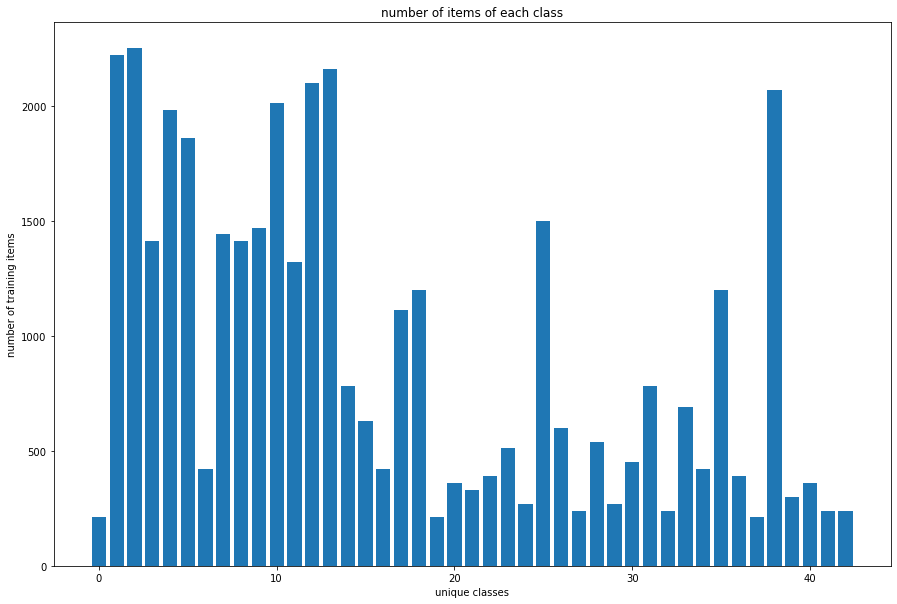

In [10]:
train_df = pd.read_csv("./data/train.csv")
mean = train_df.groupby("ClassId")["Path"].nunique()
mean = mean.to_numpy()

#making a bar plot
plt.figure(figsize=(15.,10.))
plt.title("number of items of each class")
plt.bar(range(43),mean)
plt.xlabel("unique classes")
plt.ylabel("number of training items")
plt.show()

# Norwegian Traffic signes

Preprocessing some Norwegian traffic signe pics.
The pics are gonna be used to test the models against norwegian signes insted of the german signes that were used for training.

In [27]:
project_path = os.getcwd()
path = os.path.join(project_path,'data')     
data = []
labels = []

nor_test_csv = pd.read_csv("./data/norwegian_signs.csv")
labels = nor_test_csv["ClassId"].values
images = nor_test_csv["Path"].values

for img in images:
    try:
        image = Image.open(path +'\\norwegian_signs/'+ img) # load
        #image = image.convert("L") # gray-scale
        image = image.resize((30,30))
        image = np.array(image)
        #image = np.reshape(image,(30,30,1)) # add a third chanel (gray-scale)
        data.append(image)
    except Exception as e: # in case of an exception
            print(e)
    
print(data[0].shape)
data = np.array(data) 
labels = np.array(labels)

assert data.shape[0] == labels.shape[0], "test data and test labels dont have the same length"

(30, 30, 1)


In [28]:
# save the pics
np.save("./processed_data/data_nor_test",data)
np.save("./processed_data/labels_nor_test",labels)

#gray-scale
#np.save("./processed_data/data_nor_test_gray",data)
#np.save("./processed_data/labels_nor_test_gray",labels)


In [29]:
# check again to see if everything is alright
data_nor_test = np.load("./processed_data/data_nor_test.npy")
labels_nor_test = np.load("./processed_data/labels_nor_test.npy")

# gray-scale
#data_nor_test = np.load("./processed_data/data_nor_test_gray.npy")
#labels_nor_test = np.load("./processed_data/labels_nor_test_gray.npy")


assert data_nor_test.shape[0] == labels_nor_test.shape[0], "test data and test lapels dont have the same length after loading"
assert data.shape == data_nor_test.shape, "test data before and after loading dont have the same shape"
assert labels.shape == labels_nor_test.shape, "test labels before and after loading dont have the same shape"

print(f"shape of data_nor_test: {data_nor_test.shape}")
print(f"shape of labels_nor_test: {labels_nor_test.shape}")

shape of data_nor_test: (46, 30, 30, 1)
shape of labels_nor_test: (46,)


# Norwegian Meta signs

Preprosessing the norwegian meta images to test the model on norwegian signs without background noise.

In [30]:
project_path = os.getcwd()
path = os.path.join(project_path,'data')     
data = []
labels = []

nor_test_csv = pd.read_csv("./data/norwegian_meta.csv")
labels = nor_test_csv["ClassId"].values
images = nor_test_csv["Path"].values

for img in images:
    try:
        image = Image.open(path +'\\norwegian_meta/'+ img) # load 
        #image = image.convert("L") # gray-scale
        image = image.resize((30,30))
        image = np.array(image)
        #image = np.reshape(image,(30,30,1)) # add a third chanel
        data.append(image)
    except Exception as e: # in case of an exception
            print(e)
    
print(data[0].shape)
data = np.array(data) 
labels = np.array(labels)

assert data.shape[0] == labels.shape[0], "test data and test labels dont have the same length"

(30, 30, 1)


In [31]:
# save the pics
np.save("./processed_data/data_nor_meta",data)
np.save("./processed_data/labels_nor_meta",labels)

# gray-scale
#np.save("./processed_data/data_nor_meta_gray",data)
#np.save("./processed_data/labels_nor_meta_gray",labels)

In [33]:
# check again to see if everything is alright
data_nor_meta = np.load("./processed_data/data_nor_meta.npy")
labels_nor_meta = np.load("./processed_data/labels_nor_meta.npy")


# gray-scale
#data_nor_meta = np.load("./processed_data/data_nor_meta_gray.npy")
#labels_nor_meta = np.load("./processed_data/labels_nor_meta_gray.npy")

assert data_nor_meta.shape[0] == labels_nor_meta.shape[0], "meta data and meta labels dont have the same length after loading"
assert data.shape == data_nor_meta.shape, "meta data before and after loading dont have the same shape"
assert labels.shape == labels_nor_meta.shape, "meta labels before and after loading dont have the same shape"

print(f"shape of data_nor_meta: {data_nor_meta.shape}")
print(f"shape of labels_nor_meta: {labels_nor_meta.shape}")

shape of data_nor_meta: (36, 30, 30, 1)
shape of labels_nor_meta: (36,)


# Norwegian cropped signs

making norwegian cropped test sign numpy array.

In [38]:
project_path = os.getcwd()
path = os.path.join(project_path,'data')     
data = []
labels = []

nor_test_csv = pd.read_csv("./data/norwegian_signs.csv")
labels = nor_test_csv["ClassId"].values
images = nor_test_csv["Path"].values

for img in images:
    try:
        image = Image.open(path +'\\norwegian_cropped/'+ img)
        #image = image.convert("L") # gray-scale
        image = image.resize((30,30))
        image = np.array(image)
        #image = np.reshape(image,(30,30,1)) # add a third chanel (gray-scale)
        data.append(image)
    except Exception as e: # in case of an exception
            print(e)
    
print(data[0].shape)
data = np.array(data) 
labels = np.array(labels)

assert data.shape[0] == labels.shape[0], "test data and test labels dont have the same length"

(30, 30, 3)


In [39]:
# save the pics
np.save("./processed_data/data_nor_test_cropped",data)
np.save("./processed_data/labels_nor_test_cropped",labels)


# gray-scale
#np.save("./processed_data/data_nor_test_cropped_gray",data)
#np.save("./processed_data/labels_nor_test_cropped_gray",labels)

In [41]:
# check again to see if everything is alright
data_nor_cropped = np.load("./processed_data/data_nor_test_cropped.npy")
labels_nor_cropped = np.load("./processed_data/labels_nor_test_cropped.npy")

# gray-scale
#data_nor_cropped = np.load("./processed_data/data_nor_test_cropped_gray.npy")
#labels_nor_cropped = np.load("./processed_data/labels_nor_test_cropped_gray.npy")



assert data_nor_cropped.shape[0] == labels_nor_cropped.shape[0], "test data and test lapels dont have the same length after loading"
assert data.shape == data_nor_cropped.shape, "test data before and after loading dont have the same shape"
assert labels.shape == labels_nor_cropped.shape, "test labels before and after loading dont have the same shape"

print(f"shape of data_nor_test: {data_nor_cropped.shape}")
print(f"shape of labels_nor_test: {labels_nor_cropped.shape}")

shape of data_nor_test: (46, 30, 30, 3)
shape of labels_nor_test: (46,)


# makin German meta signs np array

This will be used for final visualisation of the prediction

In [5]:
data =[] # where we are gonna store the data
classes =43 
project_path = os.getcwd() # current directory which the provided dataset is stored in ./data directory
path = os.path.join(project_path,'data/Meta')
for i in range(classes):     
        
    try:             
        image = Image.open(path +'\\'+ f"{i}.png") # load       
        image = image.resize((30,30)) #resizing the image
        image = np.array(image) # making it an np array which is expected for the model
        data.append(image)             
    except Exception as e: # in case of an exception
        print(e)
        
        
# the data and images are expected to be np arrays
data = np.array(data) 

print(f"shape of data: {data.shape}")

shape of data: (43, 30, 30, 4)


In [6]:
# will be saved in processed_data directory
np.save("./processed_data/data_ger_meta",data)